# <font color='green'>Projet Visualisation des données - Data Visualization </font> <font color='red'> © </font>

#### Licence Informatique (L3) - 2020-2021

### <font color='blue'> Groupe "New York"</font>

### <font color='green'> Institut Galilée - Université Sorbonne Paris Nord (USPN)</font>

<br>




# <font color='blue'> Etude de données sur la pollution aérienne aux abords des écoles et crèches d’Île-de-France </font>

<br>
<br>

## <font color='red'> Présentation des données </font>
<br>

Notre fichier contient des données sur la pollution aériennes aux abords des écoles et et crèches en Ile-de-France. Ces données ont été prélévés sur cinq ans, de 2012 à 2017. Ces données ont été mesuré grâce à la présence de trois particules polluantes dans l'air qui sont le NO2, le PM10 et le PM25. 

Notre fichier contient les colonnes suivant :
- ID : l'identifiant unique de la crèche ou de l'école ;
- nom : le nom usuel de l'établissement dans les fichiers de référence ;
- CP : le code postal de l'établissement ;
- ville : la ville dans laquelle se situe l'établissement ;
- type : la catégorie d'établissement (crèche, primaire ou secondaire).
- = > Ensuite nous avons les différents polluants représenté en fonction de l'année ;
- geometry : l'adresse géolocalisée de chaque établissement ;

<br>
<br>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from matplotlib.widgets import CheckButtons
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition, preprocessing 
from sklearn import datasets
import matplotlib.animation as animation;animation.writers.list()

['pillow', 'imagemagick', 'imagemagick_file', 'html']

# ACP en fonction de Paris

In [4]:
df = pd.read_csv('/Users/yanice/Desktop/VDD_Projet/eci.csv')
df = pd.DataFrame(data=df,columns=['ID','nom','departement','ville','CP','type','NO2_2012','NO2_2013','NO2_2014','NO2_2015','NO2_2016','NO2_2017','PM10_2012','PM10_2013','PM10_2014','PM10_2015','PM10_2016','PM10_2017','PM25_2012','PM25_2013','PM25_2014','PM25_2015','PM25_2016','PM25_2017','geometry'])
 
df
    

,ID,nom,departement,ville,CP,type,NO2_2012,NO2_2013,NO2_2014,NO2_2015,...,PM10_2015,PM10_2016,PM10_2017,PM25_2012,PM25_2013,PM25_2014,PM25_2015,PM25_2016,PM25_2017,geometry
0,0750026W,L'Enseignement par petits groupes (Ecole secon...,75,Paris 15,75015,secondaire,41.316912,42.916257,40.610102,37.182711,...,23.790138,23.077844,21.782889,17.152857,18.637080,14.895546,15.277787,14.806532,13.549347,"c(2.2908106734441, 48.8421565600018)"
1,0750106H,Ecole technologique privée CCIP Centre des For...,75,Paris 20,75020,secondaire,63.683878,60.890328,53.322156,45.804898,...,26.063983,23.803116,23.020608,22.692531,23.629341,18.628494,16.978740,15.434943,14.429643,"c(2.40580700033425, 48.8756657433978)"
2,0750132L,Ecole primaire privée Notre-Dame-Saint Roch,75,Paris 01,75001,primaire,41.507336,41.598420,42.855147,39.286859,...,22.995246,22.400441,20.867075,16.614189,18.142261,14.487745,14.562495,14.134427,12.561472,"c(2.33270615799049, 48.8661396641722)"
3,0750136R,Ecole primaire privée Saint-Sauveur,75,Paris 02,75002,primaire,45.197342,44.280198,45.187931,40.855468,...,23.650961,23.405547,22.650735,17.713481,19.089383,15.433904,15.067306,14.756645,15.118740,"c(2.34734689771536, 48.8668886093452)"
4,0750138T,Ecole primaire privée Sainte Geneviève du Marais,75,Paris 03,75003,primaire,40.109546,39.257252,39.688121,37.249166,...,22.808231,22.049934,20.717201,16.332941,17.645253,14.270936,14.391215,13.911639,12.654443,"c(2.36480092620121, 48.8569700986785)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12525,12192,Les p tits Cressonets,92,Vaucresson,92420,crèche,25.491322,25.555634,19.527074,22.299624,...,19.869131,17.863178,18.105259,13.803373,15.691174,12.018149,12.517553,11.253802,11.044208,"c(2.16919587783002, 48.8431345916851)"
12526,12193,Les lucioles,92,Rueil-Malmaison,92500,crèche,25.399896,27.425298,23.977558,24.256471,...,19.867671,18.068191,18.478601,14.512460,15.739200,12.129308,12.516633,11.382960,11.271947,"c(2.16847695611124, 48.8776984436972)"
12527,12194,Les coccinelles,92,Clamart,92140,crèche,28.621819,32.504379,26.327555,26.119244,...,20.140374,19.734444,19.531801,14.818853,16.465304,12.801332,12.712096,12.449960,11.889488,"c(2.26667090146341, 48.8064248969638)"
12528,12195,Soyer,92,Neuilly-sur-Seine,92200,crèche,36.340857,38.690607,37.182478,35.686455,...,22.088143,20.719541,20.285548,16.266794,17.210366,13.599715,13.961720,13.089301,12.218995,"c(2.26211365820375, 48.8873574601706)"


# Visualisation du comportement des trois polluant entre 2012 à 2017

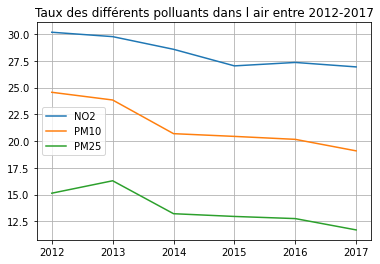

In [5]:
moyenne = df.mean()
#print(moyenne)
m1=moyenne[2:8]
#print(m1)
m2=moyenne[8:14]
#print(m2)
m3=moyenne[14:20]
#print(m3)
x = np.arange(2012,2018)
plt.plot(x,m1, label = 'NO2' )
plt.plot(x,m2, label = 'PM10' )
plt.plot(x,m3, label = 'PM25')
plt.legend()
plt.title('Taux des différents polluants dans l air entre 2012-2017')
plt.grid(True)
plt.show()
#ajouter variation,zone de confiance cm 7

In [25]:
dNO2 = {
  "Nom": ["NO2", "NO2", "NO2","NO2","NO2","NO2","PM10", "PM10", "PM10","PM10","PM10","PM10","PM25","PM25","PM25","PM25","PM25","PM25"],
  "Année": [2012, 2013, 2014,2015,2016, 2017,2012, 2013, 2014,2015,2016, 2017,2012, 2013, 2014,2015,2016, 2017],
  "Donnée": [df.NO2_2012.mean(), df.NO2_2013.mean(),df.NO2_2014.mean(),df.NO2_2015.mean(),df.NO2_2016.mean(),df.NO2_2017.mean(),df.PM10_2012.mean(), df.PM10_2013.mean(), df.PM10_2014.mean(), df.PM10_2015.mean(), df.PM10_2016.mean(), df.PM10_2017.mean(), df.PM25_2012.mean(), df.PM25_2013.mean(),df.PM25_2014.mean(),df.PM25_2015.mean(),df.PM25_2016.mean(),df.PM25_2017.mean()]}
df = pd.DataFrame(data=dNO2)
print(df)


     Nom  Année     Donnée
0    NO2   2012  30.181334
1    NO2   2013  29.771289
2    NO2   2014  28.585579
3    NO2   2015  27.035672
4    NO2   2016  27.356457
5    NO2   2017  26.939377
6   PM10   2012  24.565179
7   PM10   2013  23.844315
8   PM10   2014  20.695606
9   PM10   2015  20.440463
10  PM10   2016  20.162844
11  PM10   2017  19.086945
12  PM25   2012  15.126382
13  PM25   2013  16.290092
14  PM25   2014  13.209192
15  PM25   2015  12.953041
16  PM25   2016  12.751872
17  PM25   2017  11.692882


In [30]:
df = pd.read_csv('/Users/anissa/Desktop/ecoles-creches-idf.csv')
df = pd.DataFrame(data=df,columns=['ID','nom','departement','ville','CP','type','NO2_2012','NO2_2013','NO2_2014','NO2_2015','NO2_2016','NO2_2017','PM10_2012','PM10_2013','PM10_2014','PM10_2015','PM10_2016','PM10_2017','PM25_2012','PM25_2013','PM25_2014','PM25_2015','PM25_2016','PM25_2017','geometry'])
 


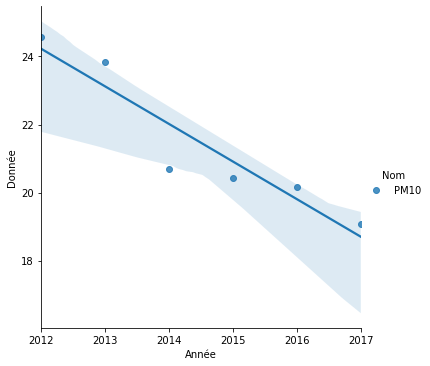

In [31]:
dPM10 = {
  "Nom": ["PM10", "PM10", "PM10","PM10","PM10","PM10"],
  "Année": [2012, 2013, 2014,2015,2016, 2017],
  "Donnée": [df.PM10_2012.mean(), df.PM10_2013.mean(), df.PM10_2014.mean(), df.PM10_2015.mean(), df.PM10_2016.mean(), df.PM10_2017.mean()]}
df = pd.DataFrame(data=dPM10)
df

g = sns.lmplot(x="Année", y="Donnée",hue="Nom", data=df);

In [32]:
df = pd.read_csv('/Users/anissa/Desktop/ecoles-creches-idf.csv')
df = pd.DataFrame(data=df,columns=['ID','nom','departement','ville','CP','type','NO2_2012','NO2_2013','NO2_2014','NO2_2015','NO2_2016','NO2_2017','PM10_2012','PM10_2013','PM10_2014','PM10_2015','PM10_2016','PM10_2017','PM25_2012','PM25_2013','PM25_2014','PM25_2015','PM25_2016','PM25_2017','geometry'])
 


In [33]:
dPM25 = {
  "Nom": ["PM25", "PM25", "PM25","PM25","PM25","PM25"],
  "Année": [2012, 2013, 2014,2015,2016, 2017],
  "Donnée": [df.PM25_2012.mean(), df.PM25_2013.mean(),df.PM25_2014.mean(),df.PM25_2015.mean(),df.PM25_2016.mean(),df.PM25_2017.mean()]}
df = pd.DataFrame(data=dPM25)
df



,Nom,Année,Donnée
0,PM25,2012,15.126382
1,PM25,2013,16.290092
2,PM25,2014,13.209192
3,PM25,2015,12.953041
4,PM25,2016,12.751872
5,PM25,2017,11.692882


# Plus le temps passe plus la concentration dimunie, et on peut voir qu'il y a un grand écart entre les trois polluant. La concentration en NO2 est en moyenne constante contrairement au autre. La concentration moyenne, maximum est atteinte pour les trois polluant en 2013



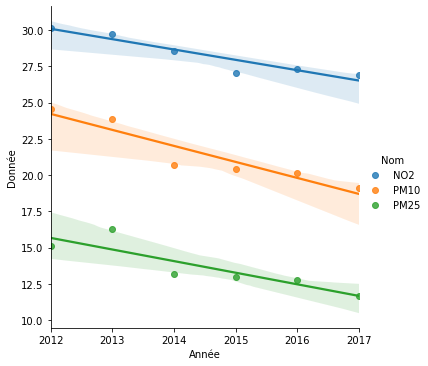

In [15]:
g = sns.lmplot(x="Année", y="Donnée", hue="Nom", data=df);

# Histogramme representant le taux de polution entre les différents département dans les différents établissements 

In [34]:
df = pd.read_csv('/Users/anissa/Desktop/ecoles-creches-idf.csv')
df = pd.DataFrame(data=df,columns=['ID','nom','departement','ville','CP','type','NO2_2012','NO2_2013','NO2_2014','NO2_2015','NO2_2016','NO2_2017','PM10_2012','PM10_2013','PM10_2014','PM10_2015','PM10_2016','PM10_2017','PM25_2012','PM25_2013','PM25_2014','PM25_2015','PM25_2016','PM25_2017','geometry'])
 


<AxesSubplot:xlabel='departement', ylabel='NO2_2012'>

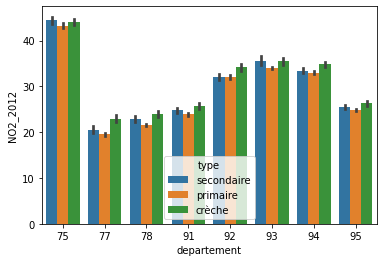

In [35]:
sns.barplot(x='departement',y='NO2_2012',data=df, hue='type')

<AxesSubplot:xlabel='departement', ylabel='NO2_2013'>

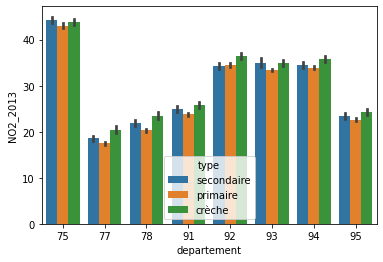

In [36]:
sns.barplot(x='departement',y='NO2_2013',data=df, hue='type')

<AxesSubplot:xlabel='departement', ylabel='NO2_2014'>

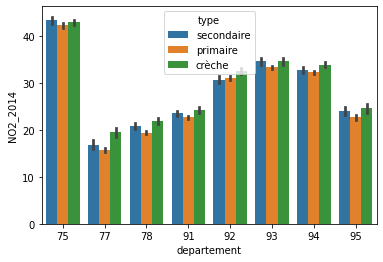

In [57]:
sns.barplot(x='departement',y='NO2_2014',data=df, hue='type')

<AxesSubplot:xlabel='departement', ylabel='NO2_2015'>

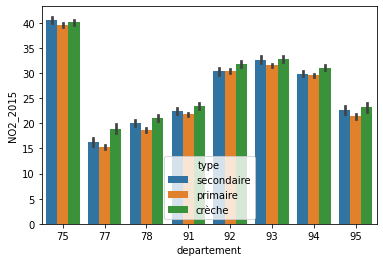

In [58]:
sns.barplot(x='departement',y='NO2_2015',data=df, hue='type')

<AxesSubplot:xlabel='departement', ylabel='NO2_2016'>

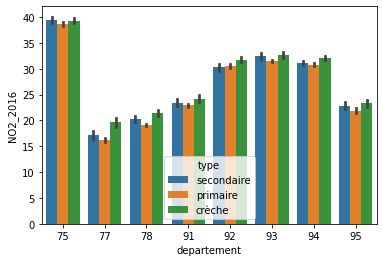

In [59]:
sns.barplot(x='departement',y='NO2_2016',data=df, hue='type')

<AxesSubplot:xlabel='departement', ylabel='NO2_2017'>

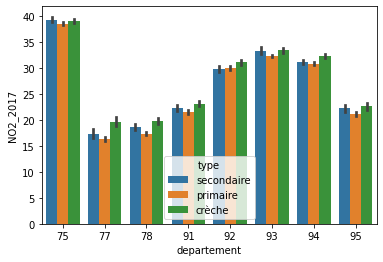

In [60]:
sns.barplot(x='departement',y='NO2_2017',data=df, hue='type')

In [56]:

paris = df.sort_values(by = 'departement')
paris

,ID,nom,departement,ville,CP,type,NO2_2012,NO2_2013,NO2_2014,NO2_2015,...,PM10_2015,PM10_2016,PM10_2017,PM25_2012,PM25_2013,PM25_2014,PM25_2015,PM25_2016,PM25_2017,geometry
0,0750026W,L'Enseignement par petits groupes (Ecole secon...,75,Paris 15,75015,secondaire,41.316912,42.916257,40.610102,37.182711,...,23.790138,23.077844,21.782889,17.152857,18.637080,14.895546,15.277787,14.806532,13.549347,"c(2.2908106734441, 48.8421565600018)"
10233,9309,MC PETITS TOURBILLONS PLANTES,75,Paris 14,75014,crèche,35.199904,36.143447,33.556453,32.644443,...,21.629825,20.871276,20.294019,15.843533,17.160700,13.492021,13.628490,13.150604,12.374924,"c(2.32184560585995, 48.828433029574)"
10234,9310,MA HYSOPE,75,Paris 13,75013,crèche,39.173948,36.871001,34.904888,34.348000,...,21.941512,21.586347,20.590911,16.896292,17.614081,13.971447,13.882612,13.658859,12.583226,"c(2.35038849602458, 48.8266505926618)"
10235,9311,MA Atelier des Ours,75,Paris 20,75020,crèche,40.596520,38.571212,40.306352,37.750833,...,23.192907,21.420500,20.578007,15.985291,17.526589,14.371732,14.611531,13.494915,12.552430,"c(2.38000900520747, 48.8712930621634)"
10236,9312,MC CRECHE ATTITUDE-ROTHSCHILD,75,Paris 19,75019,crèche,65.101885,62.485530,61.955369,53.071200,...,29.654958,26.828557,25.869042,24.125891,24.685679,21.074877,19.824624,18.179064,16.164864,"c(2.37572170568454, 48.8785806090223)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8703,0950879P,Ecole élémentaire Germaine Vie,95,Goussainville,95190,primaire,23.663048,21.460062,20.596684,20.364600,...,21.097289,20.516712,18.417423,14.622700,15.994349,14.091163,13.291292,12.925528,11.234798,"c(2.4600329777876, 49.0362237464296)"
8702,0950877M,Ecole élémentaire Bel Air,95,Franconville,95130,primaire,27.195007,24.882640,27.250955,26.207756,...,21.968673,20.061098,18.589047,15.798561,16.146295,13.751703,13.840374,12.638602,11.340269,"c(2.2325454246822, 48.9863476270519)"
8701,0950876L,Ecole élémentaire Jean Zay,95,Saint-Gratien,95210,primaire,31.699607,29.570570,30.584603,29.994884,...,22.549962,20.591502,19.610148,16.851649,17.212278,14.525728,14.264926,13.007897,12.043150,"c(2.28307325082417, 48.9649349965436)"
8699,0950871F,Ecole maternelle Jean Moulin,95,Pontoise,95300,primaire,21.802843,19.371812,18.313859,17.931890,...,20.288700,20.138268,17.001778,14.698626,15.070210,13.016078,12.781881,12.687109,10.371085,"c(2.09290740848889, 49.0637409816606)"


In [41]:
A = paris[0:2115].rename(columns={'NO2_2012': 'NO2', 'PM10_2012': 'PM10','PM25_2012': 'PM25'})

del A['ID']
del A['nom']
del A['ville']
del A['type']
del A['CP']
del A['departement']
del A['NO2_2013']
del A['NO2_2014']
del A['NO2_2015']
del A['NO2_2016']
del A['NO2_2017']
del A['PM10_2013']
del A['PM10_2014']
del A['PM10_2015']
del A['PM10_2016']
del A['PM10_2017']
del A['PM25_2013']
del A['PM25_2014']
del A['PM25_2015']
del A['PM25_2016']
del A['PM25_2017']
del A['geometry']

A=A.assign(annee=2012)

A



,NO2,PM10,PM25,annee
0,41.316912,27.311257,17.152857,2012
10233,35.199904,25.973004,15.843533,2012
10234,39.173948,27.289839,16.896292,2012
10235,40.596520,26.205396,15.985291,2012
10236,65.101885,35.871952,24.125891,2012
...,...,...,...,...
868,53.176784,31.997753,20.886750,2012
867,37.301202,25.778120,15.914653,2012
866,62.460613,35.369898,23.628868,2012
865,66.927826,35.962092,24.041876,2012


In [42]:
B = paris[0:2115].rename(columns={'NO2_2013': 'NO2', 'PM10_2013': 'PM10','PM25_2013': 'PM25'})

del B['ID']
del B['nom']
del B['ville']
del B['type']
del B['CP']
del B['departement']
del B['NO2_2012']
del B['NO2_2014']
del B['NO2_2015']
del B['NO2_2016']
del B['NO2_2017']
del B['PM10_2012']
del B['PM10_2014']
del B['PM10_2015']
del B['PM10_2016']
del B['PM10_2017']
del B['PM25_2012']
del B['PM25_2014']
del B['PM25_2015']
del B['PM25_2016']
del B['PM25_2017']
del B['geometry']

B=B.assign(annee=2013)
B

,NO2,PM10,PM25,annee
0,42.916257,27.054589,18.637080,2013
10233,36.143447,25.236324,17.160700,2013
10234,36.871001,25.789589,17.614081,2013
10235,38.571212,25.774395,17.526589,2013
10236,62.485530,34.461293,24.685679,2013
...,...,...,...,...
868,54.946757,30.449509,21.402026,2013
867,39.517063,25.741156,17.591986,2013
866,65.521186,34.437135,24.644052,2013
865,65.418838,34.354729,24.517215,2013


In [43]:
C = paris[0:2115].rename(columns={'NO2_2014': 'NO2', 'PM10_2014': 'PM10','PM25_2014': 'PM25'})

del C['ID']
del C['nom']
del C['ville']
del C['type']
del C['CP']
del C['departement']
del C['NO2_2012']
del C['NO2_2013']
del C['NO2_2015']
del C['NO2_2016']
del C['NO2_2017']
del C['PM10_2012']
del C['PM10_2013']
del C['PM10_2015']
del C['PM10_2016']
del C['PM10_2017']
del C['PM25_2012']
del C['PM25_2013']
del C['PM25_2015']
del C['PM25_2016']
del C['PM25_2017']
del C['geometry']
C=C.assign(annee=2014)

C

,NO2,PM10,PM25,annee
0,40.610102,23.092735,14.895546,2014
10233,33.556453,21.102535,13.492021,2014
10234,34.904888,21.708601,13.971447,2014
10235,40.306352,22.690017,14.371732,2014
10236,61.955369,30.808770,21.074877,2014
...,...,...,...,...
868,49.865731,25.545097,17.076205,2014
867,35.758324,21.744434,13.834545,2014
866,62.565432,30.170309,20.770287,2014
865,63.973160,30.047505,20.550884,2014


In [44]:
D = paris[0:2115].rename(columns={'NO2_2015': 'NO2', 'PM10_2015': 'PM10','PM25_2015': 'PM25'})

del D['ID']
del D['nom']
del D['ville']
del D['type']
del D['CP']
del D['departement']
del D['NO2_2012']
del D['NO2_2013']
del D['NO2_2014']
del D['NO2_2016']
del D['NO2_2017']
del D['PM10_2012']
del D['PM10_2013']
del D['PM10_2014']
del D['PM10_2016']
del D['PM10_2017']
del D['PM25_2012']
del D['PM25_2013']
del D['PM25_2014']
del D['PM25_2016']
del D['PM25_2017']
del D['geometry']
D=D.assign(annee=2015)

D

,NO2,PM10,PM25,annee
0,37.182711,23.790138,15.277787,2015
10233,32.644443,21.629825,13.628490,2015
10234,34.348000,21.941512,13.882612,2015
10235,37.750833,23.192907,14.611531,2015
10236,53.071200,29.654958,19.824624,2015
...,...,...,...,...
868,48.963727,27.019546,17.756113,2015
867,33.740225,22.772062,14.442399,2015
866,57.350927,30.513452,20.560554,2015
865,60.814016,30.144652,20.103131,2015


In [45]:
E = paris[0:2115].rename(columns={'NO2_2016': 'NO2', 'PM10_2016': 'PM10','PM25_2016': 'PM25'})

del E['ID']
del E['nom']
del E['ville']
del E['type']
del E['CP']
del E['departement']
del E['NO2_2012']
del E['NO2_2013']
del E['NO2_2014']
del E['NO2_2015']
del E['NO2_2017']
del E['PM10_2012']
del E['PM10_2013']
del E['PM10_2014']
del E['PM10_2015']
del E['PM10_2017']
del E['PM25_2012']
del E['PM25_2013']
del E['PM25_2014']
del E['PM25_2015']
del E['PM25_2017']
del E['geometry']
E=E.assign(annee=2016)

E


,NO2,PM10,PM25,annee
0,37.885329,23.077844,14.806532,2016
10233,31.845301,20.871276,13.150604,2016
10234,33.094400,21.586347,13.658859,2016
10235,37.491773,21.420500,13.494915,2016
10236,51.348832,26.828557,18.179064,2016
...,...,...,...,...
868,47.515142,24.435463,16.090072,2016
867,34.603633,21.295128,13.474931,2016
866,55.101172,28.063421,18.722885,2016
865,57.257853,28.902960,19.187864,2016


In [46]:
F = paris[0:2115].rename(columns={'NO2_2017': 'NO2', 'PM10_2017': 'PM10','PM25_2017': 'PM25'})

del F['ID']
del F['nom']
del F['ville']
del F['type']
del F['CP']
del F['departement']



del F['NO2_2012']
del F['NO2_2013']
del F['NO2_2014']
del F['NO2_2015']
del F['NO2_2016']



del F['PM10_2012']
del F['PM10_2013']
del F['PM10_2014']
del F['PM10_2015']
del F['PM10_2016']



del F['PM25_2012']
del F['PM25_2013']
del F['PM25_2014']
del F['PM25_2015']
del F['PM25_2016']
del F['geometry']
F=F.assign(annee=2017)

F

#série chronologieque, visualisation dez courbe




,NO2,PM10,PM25,annee
0,37.345489,21.782889,13.549347,2017
10233,33.623989,20.294019,12.374924,2017
10234,34.936284,20.590911,12.583226,2017
10235,36.978380,20.578007,12.552430,2017
10236,51.199978,25.869042,16.164864,2017
...,...,...,...,...
868,42.341450,23.505609,15.986449,2017
867,32.457193,20.393392,12.425734,2017
866,52.290102,27.084583,18.167784,2017
865,54.295945,26.613308,16.571625,2017


Trie le tableau par département:

In [47]:
tab_acp = pd.concat([A,B,C,D,E,F])
tab_acp

,NO2,PM10,PM25,annee
0,41.316912,27.311257,17.152857,2012
10233,35.199904,25.973004,15.843533,2012
10234,39.173948,27.289839,16.896292,2012
10235,40.596520,26.205396,15.985291,2012
10236,65.101885,35.871952,24.125891,2012
...,...,...,...,...
868,42.341450,23.505609,15.986449,2017
867,32.457193,20.393392,12.425734,2017
866,52.290102,27.084583,18.167784,2017
865,54.295945,26.613308,16.571625,2017


Text(0, 0.5, 'Année')

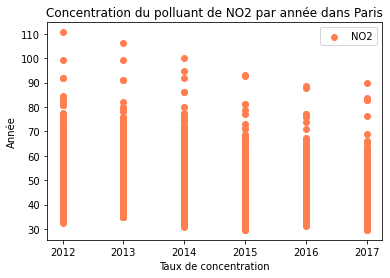

In [54]:
x = tab_acp['NO2']

k = tab_acp['annee']

plt.scatter(k, x,c='coral', label='NO2')

plt.legend()

plt.title('Concentration du polluant de NO2 par année dans Paris')
plt.xlabel('Taux de concentration')
plt.ylabel('Année')

Text(0, 0.5, 'Année')

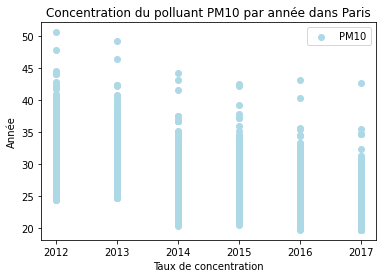

In [53]:

y = tab_acp['PM10']
k = tab_acp['annee']

plt.scatter(k, y, c='lightblue', label='PM10')

plt.legend()

plt.title('Concentration du polluant PM10 par année dans Paris')
plt.xlabel('Taux de concentration')
plt.ylabel('Année')

Text(0, 0.5, 'Année')

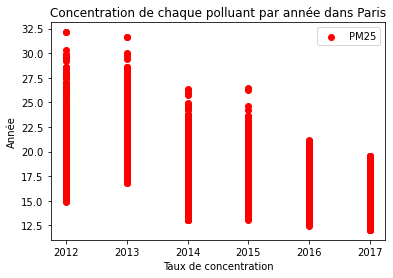

In [52]:
z = tab_acp['PM25']
k = tab_acp['annee']

plt.scatter(k, z, c='red', label='PM25')

plt.legend()

plt.title('Concentration du polluant PM25 par année dans Paris')
plt.xlabel('Taux de concentration')
plt.ylabel('Année')

Text(0, 0.5, 'Année')

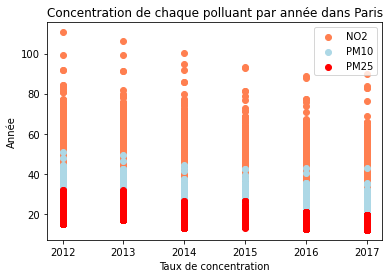

In [55]:
x = tab_acp['NO2']
y = tab_acp['PM10']
z = tab_acp['PM25']
k = tab_acp['annee']

plt.scatter(k, x,c='coral', label='NO2')


plt.scatter(k, y, c='lightblue', label='PM10')

plt.scatter(k, z, c='red', label='PM25')


plt.legend()

plt.title('Concentration de chaque polluant par année dans Paris')
plt.xlabel('Taux de concentration')
plt.ylabel('Année')


# Compte les établissement par département

In [49]:
df['departement'].value_counts()

75    2115
78    1717
77    1635
93    1535
92    1507
91    1393
94    1316
95    1312
Name: departement, dtype: int64

In [86]:
print(tab_acp)


             NO2       PM10       PM25  annee
0      41.316912  27.311257  17.152857   2012
10233  35.199904  25.973004  15.843533   2012
10234  39.173948  27.289839  16.896292   2012
10235  40.596520  26.205396  15.985291   2012
10236  65.101885  35.871952  24.125891   2012
...          ...        ...        ...    ...
868    42.341450  23.505609  15.986449   2017
867    32.457193  20.393392  12.425734   2017
866    52.290102  27.084583  18.167784   2017
865    54.295945  26.613308  16.571625   2017
869    48.772745  24.246757  14.906732   2017

[12690 rows x 4 columns]


# Ecart type des donnée de chaque polluant

Text(0.5, 1.0, 'Evolution du poluant PM25 entre 2012 à 2010 ')

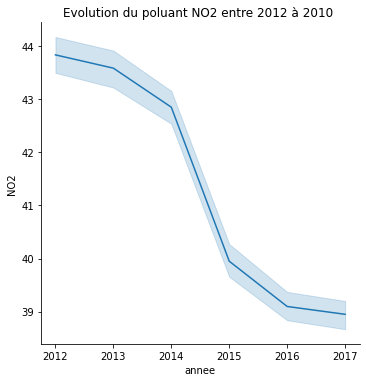

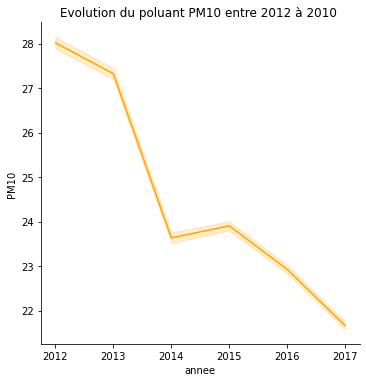

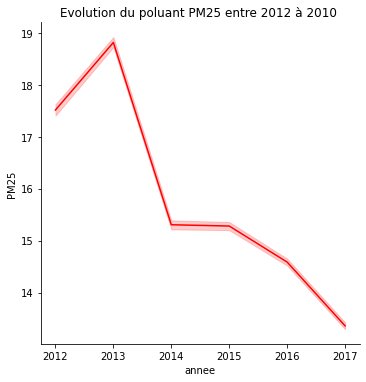

In [97]:
sns.relplot( data=tab_acp, kind="line", x="annee", y= "NO2")
plt.title("Evolution du poluant NO2 entre 2012 à 2010 ")
sns.relplot( data=tab_acp, kind="line", x="annee", y= "PM10",color='orange')
plt.title("Evolution du poluant PM10 entre 2012 à 2010 ")
sns.relplot( data=tab_acp, kind="line", x="annee", y= "PM25", color='red')
plt.title("Evolution du poluant PM25 entre 2012 à 2010 ")


# 